# Atahar Imtiaz

## Research question/interests

Briefly describe your research question or interests here.

In [ ]:
#Premier League Players

**Our data works with Goals(denoted as G), Expected Goals(denoted as xG), Assists(denoted as A), Expected Assists(denoted as xA), Goals per 90 minutes(denoted as xG90), Assists per 90 minutes(denoted as xA90).
Our goal is to find the correlation between G and xG, A and xA, and how xA90 contributes to xG90 and overall the coherency of the data.**

Each of us will be working with different sets of the data present, where my accountability would be for the relation between A and xA, how both of these sets of data correlate to each other.


In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math 
df = pd.read_csv('../data/processed/Premier_League_players.xlsx.csv')
df.head()

,№,Player,Team,Apps,Min,G,A,xG,G - xG,xA,xA - A,xG90,xA90
0,1,Son Heung-Min,Tottenham,35,3051,23,7,16.99,6.01,7.85,-0.85,0.50,0.23
1,2,Mohamed Salah,Liverpool,35,2757,23,13,24.36,-1.36,9.79,3.21,0.80,0.32
2,3,Cristiano Ronaldo,Manchester United,30,2468,18,3,17.21,0.79,4.42,-1.42,0.63,0.16
3,4,Harry Kane,Tottenham,37,3229,17,9,20.69,-3.69,9.82,-0.82,0.58,0.27
4,5,Sadio Mané,Liverpool,34,2833,16,2,16.83,-0.83,5.27,-3.27,0.53,0.17


<seaborn.axisgrid.JointGrid>

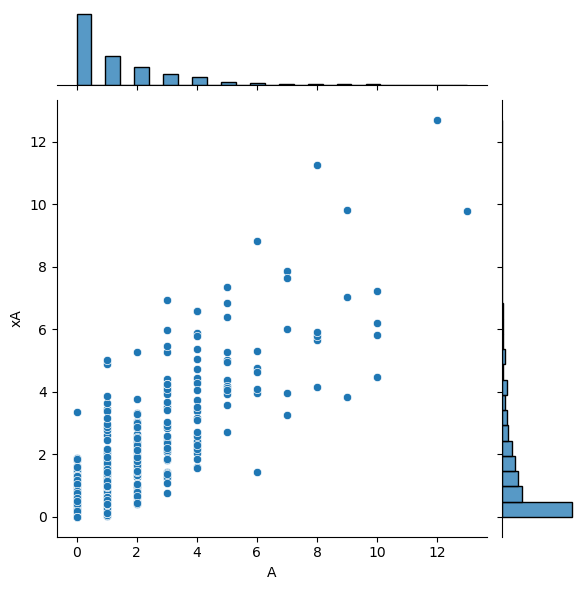

In [ ]:
sns.jointplot(x='A',y='xA', data=df)

In [ ]:
A_data = np.array(df['A'])
A_low, A_hgh = np.percentile(A_data, [1, 99])
print(A_low, A_hgh)
df_no_outlier_A = df.copy()[df['A'].between(A_low, A_hgh)]

print(len(df_no_outlier_A))
df_no_outlier_A.head()

0.0 9.639999999999986
531


,№,Player,Team,Apps,Min,G,A,xG,G - xG,xA,xA - A,xG90,xA90
0,1,Son Heung-Min,Tottenham,35,3051,23,7,16.99,6.01,7.85,-0.85,0.50,0.23
2,3,Cristiano Ronaldo,Manchester United,30,2468,18,3,17.21,0.79,4.42,-1.42,0.63,0.16
3,4,Harry Kane,Tottenham,37,3229,17,9,20.69,-3.69,9.82,-0.82,0.58,0.27
4,5,Sadio Mané,Liverpool,34,2833,16,2,16.83,-0.83,5.27,-3.27,0.53,0.17
5,6,Kevin De-Bruyne,Manchester City,30,2214,15,8,5.95,9.05,11.26,-3.26,0.24,0.46


In [ ]:
xA_data = np.array(df['xA'])
xA_low, xA_hgh = np.percentile(xA_data, [1, 99])
print(xA_low, xA_hgh)
df_no_outlier = df_no_outlier_A.copy()[df_no_outlier_A['xA'].between(xA_low, xA_hgh)]

print(len(df_no_outlier))
df_no_outlier.head()

0.0 7.770799999999997
527


,№,Player,Team,Apps,Min,G,A,xG,G - xG,xA,xA - A,xG90,xA90
2,3,Cristiano Ronaldo,Manchester United,30,2468,18,3,17.21,0.79,4.42,-1.42,0.63,0.16
4,5,Sadio Mané,Liverpool,34,2833,16,2,16.83,-0.83,5.27,-3.27,0.53,0.17
6,7,Jamie Vardy,Leicester,25,1807,15,2,9.99,5.01,1.61,0.39,0.50,0.08
7,8,Diogo Jota,Liverpool,35,2401,15,4,17.35,-2.35,5.87,-1.87,0.65,0.22
8,9,Wilfried Zaha,Crystal Palace,33,2762,14,1,10.18,3.82,4.89,-3.89,0.33,0.16


<seaborn.axisgrid.JointGrid>

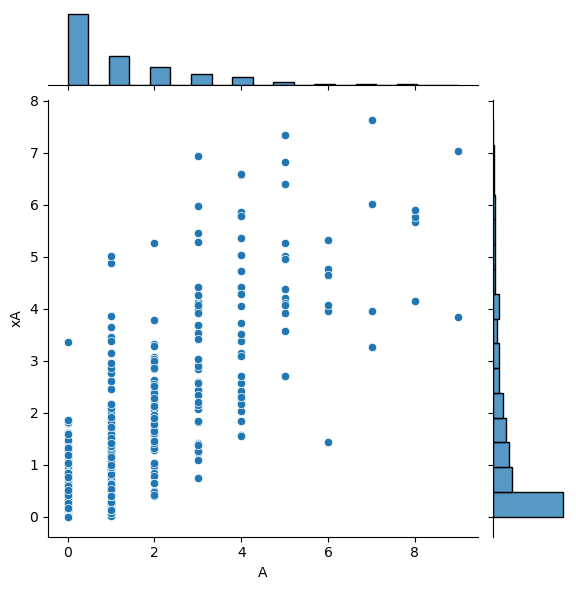

In [ ]:
sns.jointplot(x='A',y='xA', data=df_no_outlier)

In [ ]:
print(df_detailed['xA'].min(), df_detailed['xA'].max(), df_detailed['A'].min(), df_detailed['A'].max())

NameError: name 'df_detailed' is not defined

In [ ]:
print(df_detailed['xA'].min(), df_detailed['xA'].max(), df_detailed['A'].min(), df_detailed['A'].max())

NameError: name 'df_detailed' is not defined

In [ ]:
len(df_no_zero)

NameError: name 'df_no_zero' is not defined

In [ ]:
df_detailed=df_no_zero.copy()
df_detailed['Ratio'] = df_detailed['A'] / df_detailed['xA']

NameError: name 'df_no_zero' is not defined

In [ ]:
df_detailed.plot(kind='scatter', x='A', y='Ratio')

NameError: name 'df_detailed' is not defined

In [ ]:
df_detailed.plot(kind='scatter', x='xA', y='Ratio')

NameError: name 'df_detailed' is not defined

In [ ]:
Ratio_data = np.array(df_detailed['Ratio'])
print(Ratio_data.min(), Ratio_data.max(), math.sqrt(len(Ratio_data)))


NameError: name 'df_detailed' is not defined

In [ ]:
Ratio_bins = np.linspace(Ratio_data.min(), Ratio_data.max(), 19)
df_detailed['Ratio'].plot(kind='hist', bins=Ratio_bins, figsize=(12,6), facecolor='grey',edgecolor='black')

NameError: name 'Ratio_data' is not defined

In [ ]:
Ratio_bins = np.linspace(Ratio_data.min(), Ratio_data.max(), 100)
df_detailed['Ratio'].plot(kind='hist', bins=Ratio_bins, figsize=(12,6), facecolor='grey',edgecolor='black')

NameError: name 'Ratio_data' is not defined

In [ ]:
Ratio_low, Ratio_hgh = np.percentile(Ratio_data, [1, 99])
print(Ratio_low, Ratio_hgh)

NameError: name 'Ratio_data' is not defined

In [ ]:
df_popularRatios = df_detailed.copy()[df_detailed['Ratio'].between(Ratio_low, Ratio_hgh)]
df_popularRatios.head()

NameError: name 'df_detailed' is not defined

In [ ]:
Ratio_data = np.array(df_popularRatios['Ratio'])
print(Ratio_data.min(), Ratio_data.max(), math.sqrt(len(Ratio_data)))

NameError: name 'df_popularRatios' is not defined

In [ ]:
Ratio_bins = np.linspace(Ratio_data.min(), Ratio_data.max(), 19)
df_popularRatios['Ratio'].plot(kind='hist', bins=Ratio_bins, figsize=(12,6), facecolor='grey',edgecolor='black')

NameError: name 'Ratio_data' is not defined

In [ ]:
df_detailed=df_no_zero.copy()
df_detailed['Ratio'] = df_detailed['A'] / df_detailed['xA']

NameError: name 'df_no_zero' is not defined

In [ ]:
df_detailed.plot(kind='scatter', x='A', y='Ratio')

NameError: name 'df_detailed' is not defined

In [ ]:
df_no_outlier.head()

,№,Player,Team,Apps,Min,G,A,xG,G - xG,xA,xA - A,xG90,xA90
2,3,Cristiano Ronaldo,Manchester United,30,2468,18,3,17.21,0.79,4.42,-1.42,0.63,0.16
4,5,Sadio Mané,Liverpool,34,2833,16,2,16.83,-0.83,5.27,-3.27,0.53,0.17
6,7,Jamie Vardy,Leicester,25,1807,15,2,9.99,5.01,1.61,0.39,0.50,0.08
7,8,Diogo Jota,Liverpool,35,2401,15,4,17.35,-2.35,5.87,-1.87,0.65,0.22
8,9,Wilfried Zaha,Crystal Palace,33,2762,14,1,10.18,3.82,4.89,-3.89,0.33,0.16


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#define predictor and response variables
X = df_no_outlier[["G", "A", "xG", "xA", "xG90", "Apps", "Min"]]
y = df_no_outlier[["xA"]]

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 7):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('xA')

NameError: name 'PCA' is not defined

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

NameError: name 'pca' is not defined

https://towardsdatascience.com/principal-component-regression-clearly-explained-and-implemented-608471530a2f

In [ ]:
target = 'xA'
X = df_no_outlier.drop(target,axis=1)
y = df_no_outlier[target]

In [ ]:
df_no_outlier.columns

Index(['№', 'Player', 'Team', 'Apps', 'Min', 'G', 'A', 'xG', 'G - xG', 'xA',
       'xA - A', 'xG90', 'xA90'],
      dtype='object')

In [ ]:
df2 = df_no_outlier.copy().drop('Player', axis=1)
df2 = df2.drop('Team', axis=1)
df2 = df2.drop('№', axis=1)
df2.head()

,Apps,Min,G,A,xG,G - xG,xA,xA - A,xG90,xA90
2,30,2468,18,3,17.21,0.79,4.42,-1.42,0.63,0.16
4,34,2833,16,2,16.83,-0.83,5.27,-3.27,0.53,0.17
6,25,1807,15,2,9.99,5.01,1.61,0.39,0.50,0.08
7,35,2401,15,4,17.35,-2.35,5.87,-1.87,0.65,0.22
8,33,2762,14,1,10.18,3.82,4.89,-3.89,0.33,0.16


In [ ]:
target = 'xA'
X = df2.drop(target,axis=1)
y = df2[target]

In [ ]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

# Run standardization on X variables
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Define cross-validation folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Linear Regression
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
lr_score_train = -1 * cross_val_score(lin_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
lr_score_test = mean_squared_error(y_test, lin_reg.predict(X_test_scaled), squared=False)

# Lasso Regression
lasso_reg = LassoCV().fit(X_train_scaled, y_train)
lasso_score_train = -1 * cross_val_score(lasso_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
lasso_score_test = mean_squared_error(y_test, lasso_reg.predict(X_test_scaled), squared=False)

# Ridge Regression
ridge_reg = RidgeCV().fit(X_train_scaled, y_train)
ridge_score_train = -1 * cross_val_score(ridge_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
ridge_score_test = mean_squared_error(y_test, ridge_reg.predict(X_test_scaled), squared=False)

NameError: name 'KFold' is not defined

In [ ]:
print(lr_score_test, lasso_score_test, ridge_score_test)

NameError: name 'lr_score_test' is not defined

In [ ]:
# Generate all the principal components
pca = PCA() # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(X_train_scaled)

# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

NameError: name 'PCA' is not defined

In [ ]:
pca.explained_variance_ratio_

NameError: name 'pca' is not defined

In [ ]:
# Initialize linear regression instance
lin_reg = LinearRegression()

# Create empty list to store RMSE for each iteration
rmse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
    
# Visual analysis - plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

NameError: name 'LinearRegression' is not defined

In [ ]:
y.mean()

1.3198481973434537

In [ ]:
# Visually determine optimal number of principal components
best_pc_num = 7

# Train model with first 7 principal components
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

# Get cross-validation RMSE (train set)
pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()

# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

# Get first 9 principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]

# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_test, preds, squared=False)

pcr_score_test

NameError: name 'LinearRegression' is not defined